In [19]:
import torch

class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

model = Polynomial3()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, 
                                                max_lr=1.0, 
                                                total_steps=100,
                                                max_momentum=0.99,
                                                base_momentum=0.85,
                                                pct_start=0.3,
                                                div_factor=10,
                                                cycle_momentum=True,
                                                three_phase=False
                                                )
lrs = []
mom = []
for step in range(100):
    scheduler.step()
    lrs.append(scheduler.get_lr()[0])
    m = optimizer.state_dict()["param_groups"][0]["momentum"]
    mom.append(m)
min(lrs), max(lrs), min(mom), max(mom)

/var/data/cgaydon/anaconda3/envs/validation_module/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
/var/data/cgaydon/anaconda3/envs/validation_module/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:1289: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


(1e-05, 1.0, 0.85, 0.99)

/var/data/cgaydon/anaconda3/envs/validation_module/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/data/cgaydon/anaconda3/envs/validation_module/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

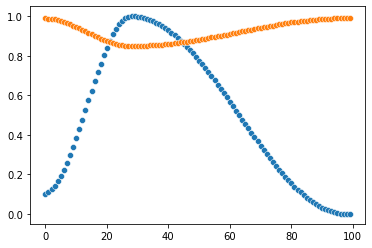

In [20]:
import seaborn as sns
sns.scatterplot(range(len(lrs)),lrs)
sns.scatterplot(range(len(mom)),mom)